In [1]:
%matplotlib inline


# Font Table TTF


Matplotlib has support for FreeType fonts.  Here's a little example
using the 'table' command to build a font table that shows the glyphs
by character code.

Usage python font_table_ttf.py somefile.ttf




UnicodeDecodeError: 'ascii' codec can't decode byte 0xa0 in position 0: ordinal not in range(128)

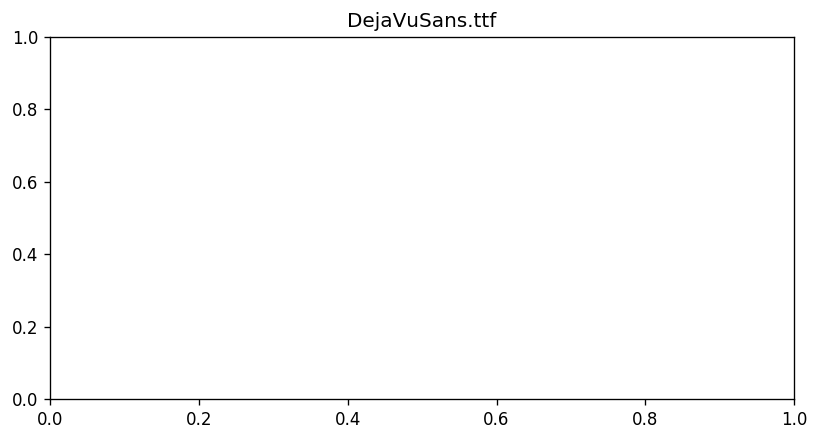

In [5]:
import sys
import os

import matplotlib
from matplotlib.ft2font import FT2Font
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

# the font table grid

labelc = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
          'A', 'B', 'C', 'D', 'E', 'F']
labelr = ['00', '10', '20', '30', '40', '50', '60', '70', '80', '90',
          'A0', 'B0', 'C0', 'D0', 'E0', 'F0']

fontname = 'DejaVuSans.ttf'

font = FT2Font(fontname)
codes = sorted(font.get_charmap().items())

# a 16,16 array of character strings
chars = [['' for c in range(16)] for r in range(16)]
colors = [[(0.95, 0.95, 0.95) for c in range(16)] for r in range(16)]

plt.figure(figsize=(8, 4), dpi=120)
for ccode, glyphind in codes:
    if ccode >= 256:
        continue
    r, c = divmod(ccode, 16)
    s = chr(ccode)
    chars[r][c] = s

lightgrn = (0.5, 0.8, 0.5)
plt.title(fontname)
tab = plt.table(cellText=chars,
                rowLabels=labelr,
                colLabels=labelc,
                rowColours=[lightgrn] * 16,
                colColours=[lightgrn] * 16,
                cellColours=colors,
                cellLoc='center',
                loc='upper left')

for key, cell in tab.get_celld().items():
    row, col = key
    if row > 0 and col > 0:
        cell.set_text_props(fontproperties=FontProperties(fname=fontname))
plt.axis('off')
plt.show()